## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,power_transform
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from scipy.stats import zscore
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset from github repository

In [2]:
data = pd.read_csv('census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

### Upon review, I can see that the dataset contains 32560 rows and 15 columns

### Checking for null values in the dataset

In [4]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### We can see that there are no null values in the dataset

### Checking for the datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Income'>

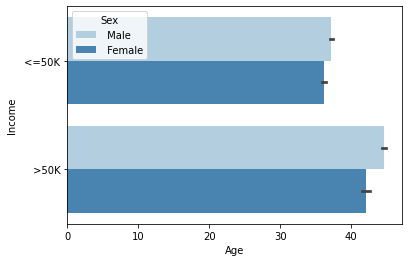

In [7]:
sns.barplot(x = 'Age', y = 'Income', hue = 'Sex',data = data, palette = 'Blues')

### Here we can see that the people who earn less then 50K are less than 40 years old and income crosses 50K only after 35 years approx. We can also see that overall the Female employees earn lesser when compared to the Male.

<AxesSubplot:xlabel='Sex', ylabel='count'>

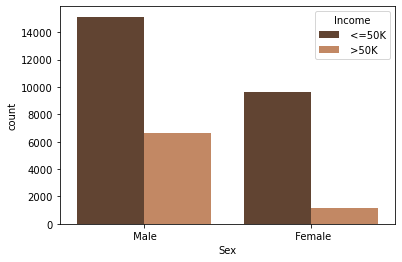

In [8]:
sns.countplot(x = 'Sex', hue = 'Income', palette = 'copper', data = data)

<AxesSubplot:xlabel='Marital_status', ylabel='Age'>

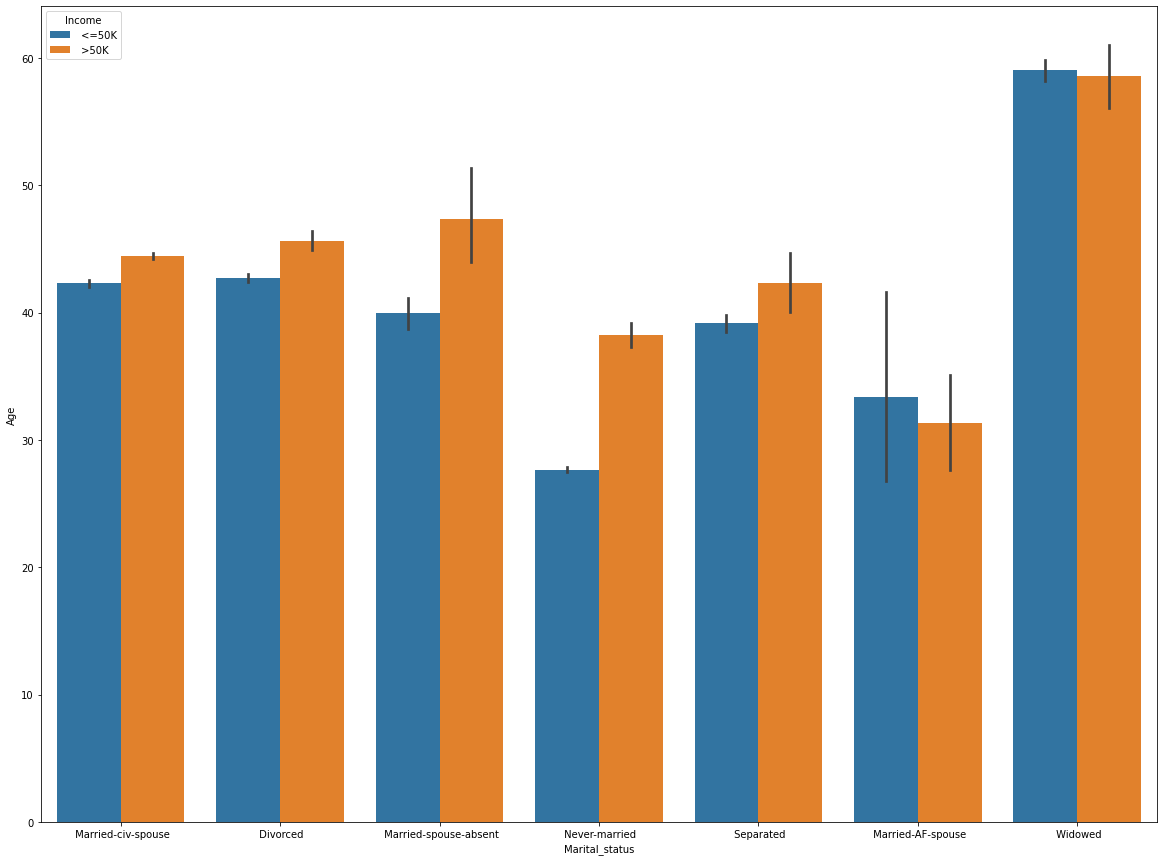

In [9]:
plt.figure(figsize = (20,15))
sns.barplot(data = data,x = 'Marital_status', y ='Age', hue = 'Income')

### We can see that most of the marital status have some effect on the income range, still the income range is dependent on the Age

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

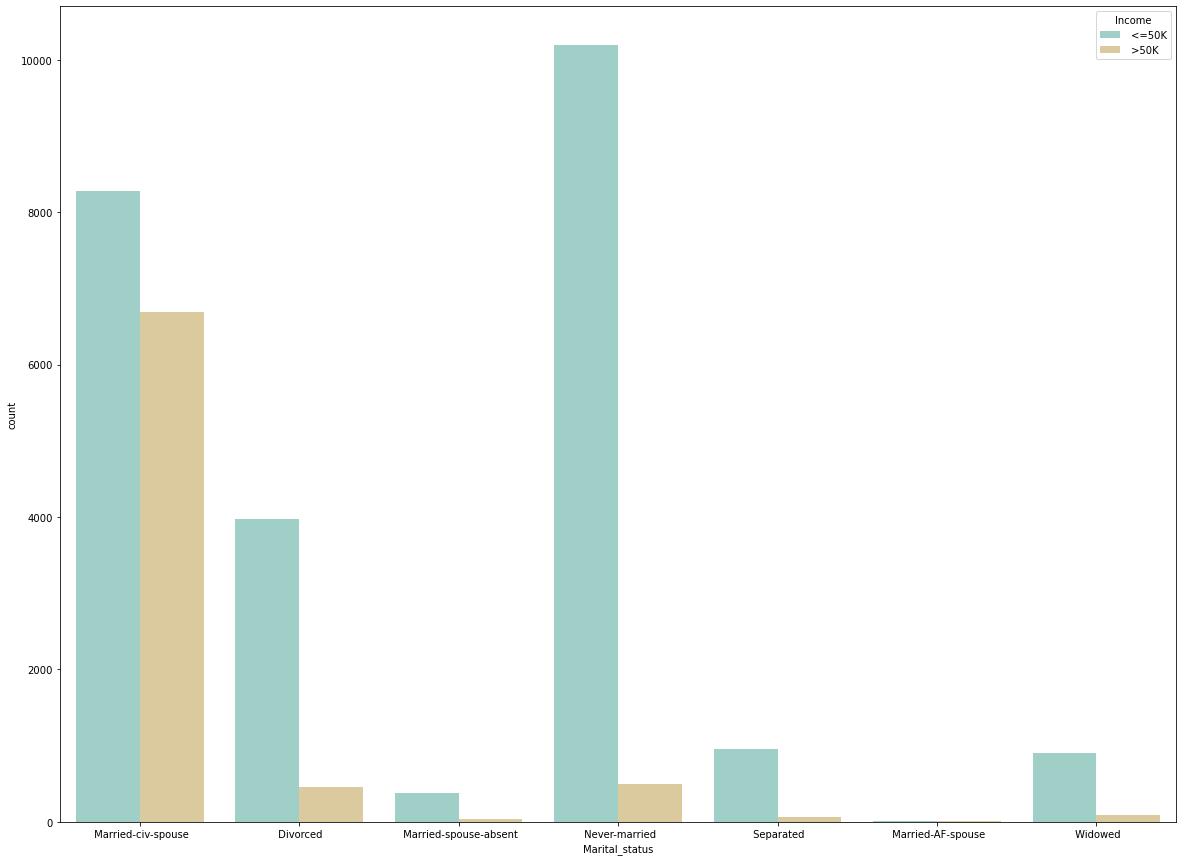

In [10]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'Marital_status',hue = 'Income', data =data, palette='BrBG_r')

### The income group of  greater than 50K is most common among the married people when compared to other marital Status

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

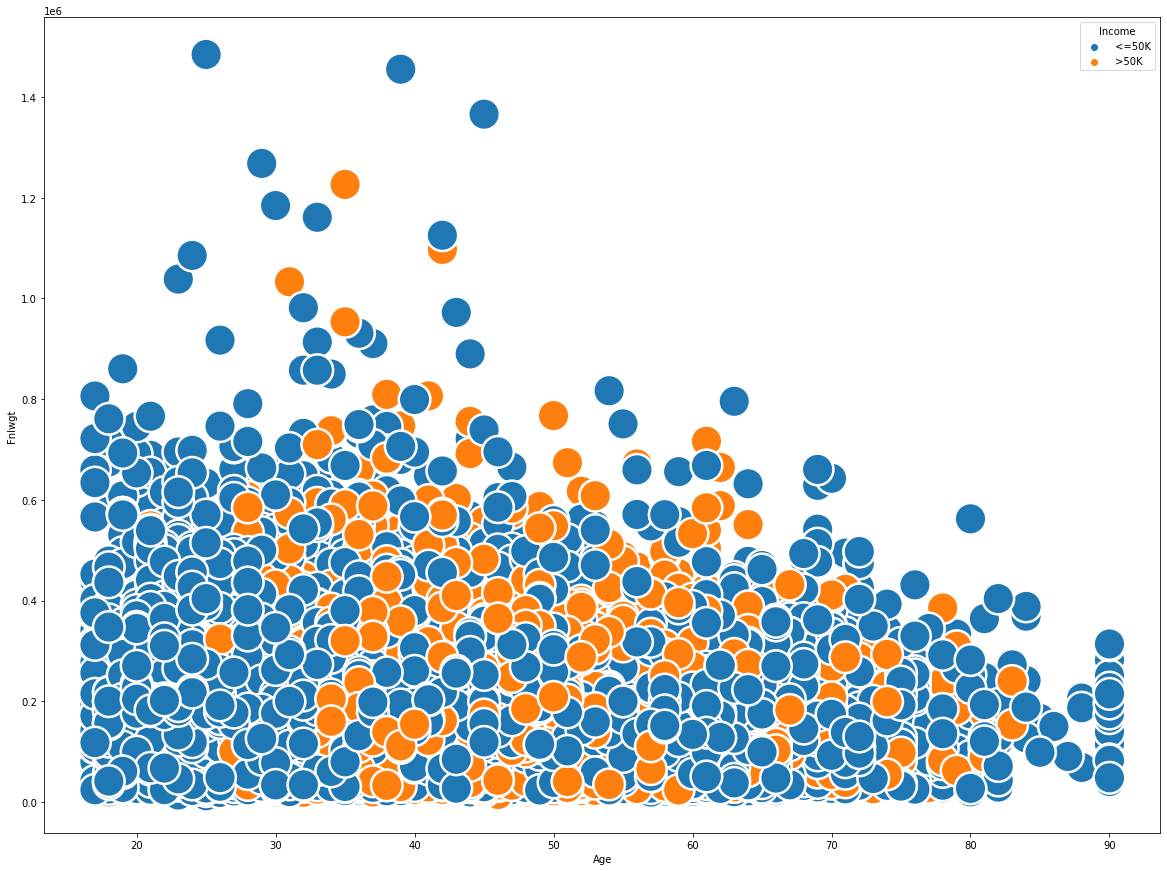

In [11]:
plt.figure(figsize = (20,15))
sns.scatterplot(x = 'Age', y = 'Fnlwgt',hue = 'Income', s = 1000, data =data, legend = 'brief', cmap = 'PuBu_r')

### I can see that most most of the high income peoples are between 0 to 800K and the age starts from 35

### I can see the highest proportion of people who gained greater than 50K are Doctorates and school professors

In [12]:
cross = pd.crosstab(index = data['Education'],columns = data['Income'])
round((cross.T/cross.sum(axis=1)).T,2)

Income,<=50K,>50K
Education,,
10th,0.93,0.07
11th,0.95,0.05
12th,0.92,0.08
1st-4th,0.96,0.04
5th-6th,0.95,0.05
7th-8th,0.94,0.06
9th,0.95,0.05
Assoc-acdm,0.75,0.25
Assoc-voc,0.74,0.26


### Although the highest count of people who gained higher salary (above 50K) is the people with bachelor degree

<AxesSubplot:xlabel='Education', ylabel='count'>

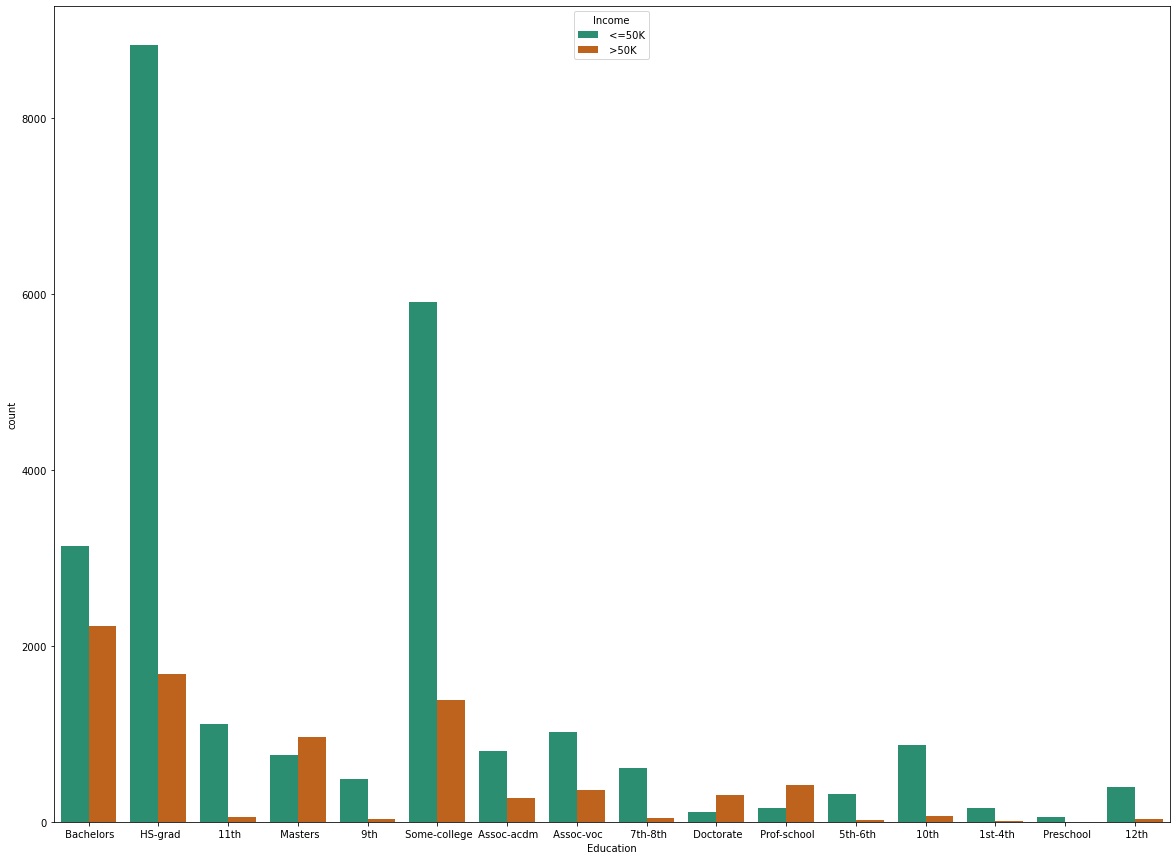

In [13]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'Education', hue = 'Income', palette = 'Dark2', data = data)

### We can see that professors and Exec-managerial positions had the highest proportion of salary for more than 50K

In [14]:
cross = pd.crosstab(index = data['Occupation'],columns = data['Income'])
round((cross.T/cross.sum(axis=1)).T,2)

Income,<=50K,>50K
Occupation,,
?,0.90,0.10
Adm-clerical,0.87,0.13
Armed-Forces,0.89,0.11
Craft-repair,0.77,0.23
Exec-managerial,0.52,0.48
Farming-fishing,0.88,0.12
Handlers-cleaners,0.94,0.06
Machine-op-inspct,0.88,0.12
Other-service,0.96,0.04


### Even from the nuber of people who achieved more salary were either Prof- Speciality or Exec-Managerial positions

<AxesSubplot:xlabel='Occupation', ylabel='count'>

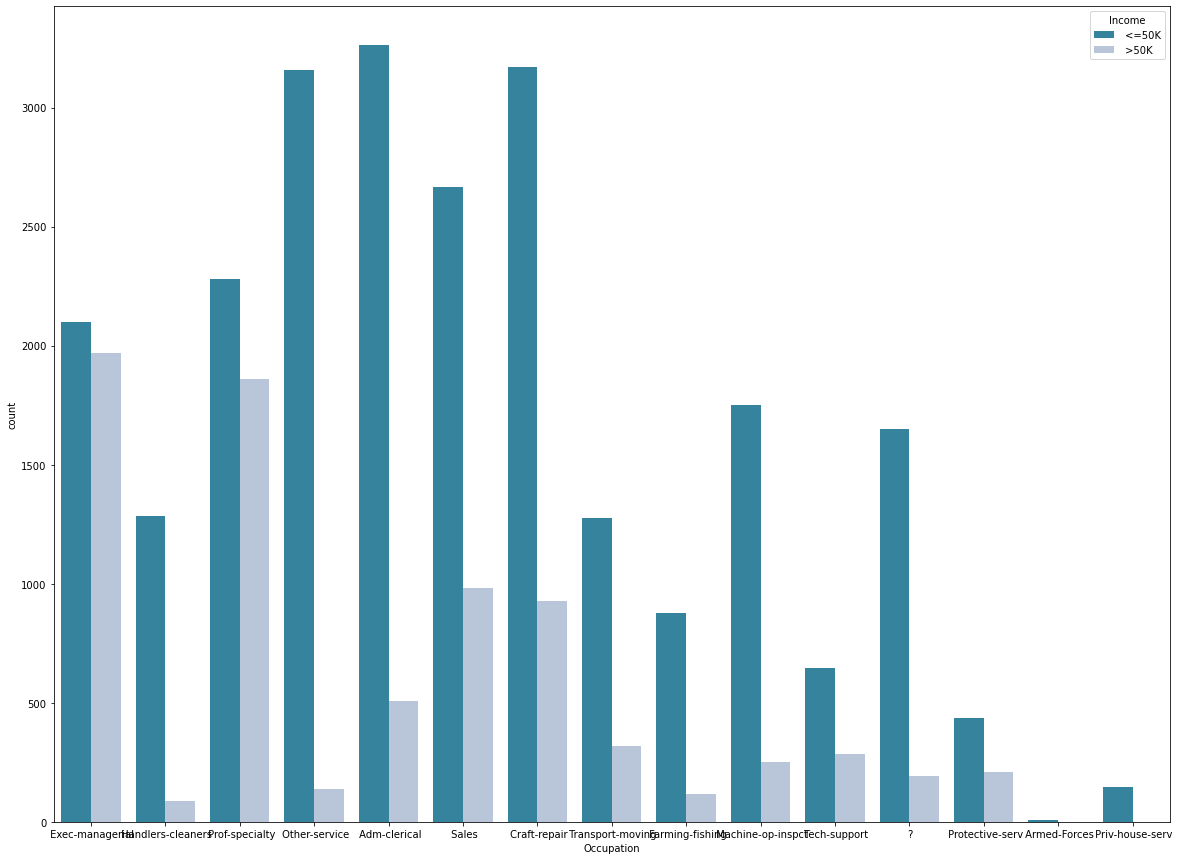

In [15]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'Occupation', hue = 'Income', palette = 'PuBuGn_r', data = data)

In [16]:
cross = pd.crosstab(index= data['Relationship'],columns = data['Income'])
round(((cross.T)/cross.sum(axis =1)).T,2)

Income,<=50K,>50K
Relationship,,
Husband,0.55,0.45
Not-in-family,0.90,0.10
Other-relative,0.96,0.04
Own-child,0.99,0.01
Unmarried,0.94,0.06
Wife,0.52,0.48


### Looking at the proportion of people who gained salary >50K, wives were highest. However we can see from the count husbands were highest gainers more than 50K

<AxesSubplot:xlabel='Relationship', ylabel='count'>

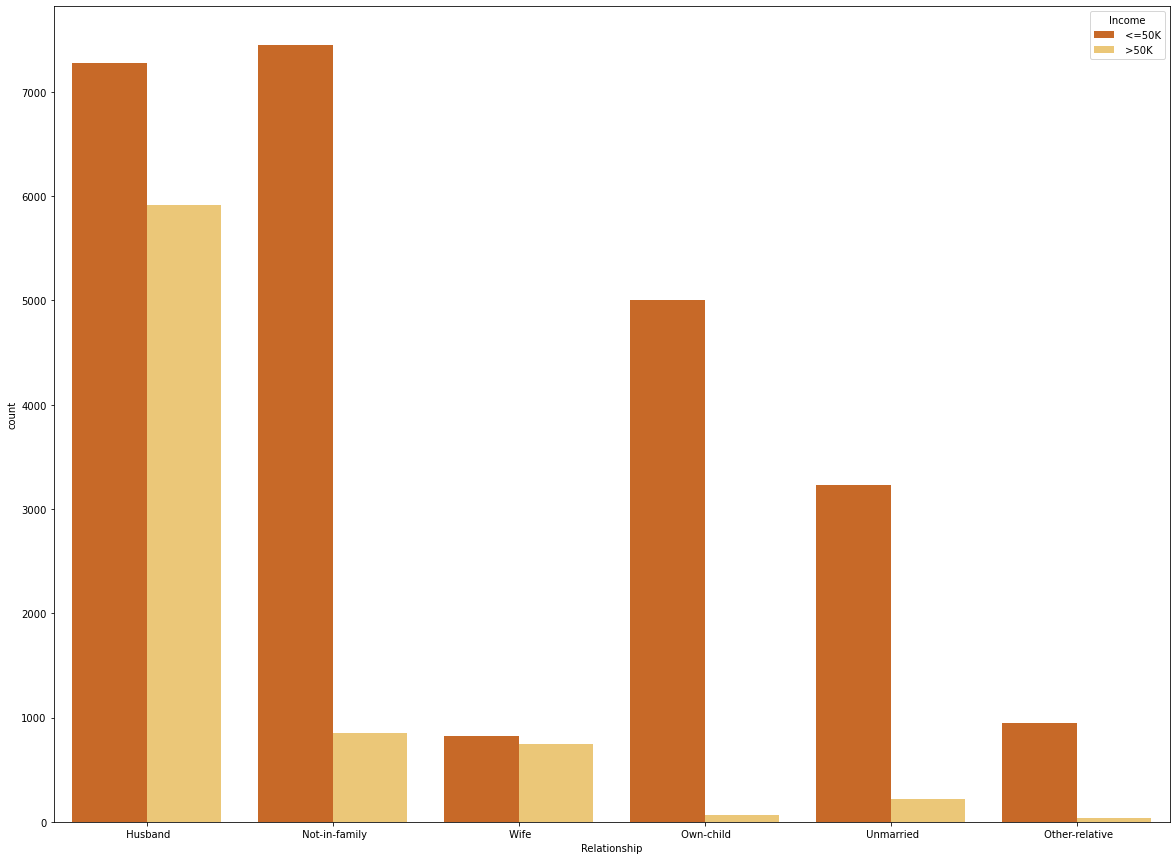

In [17]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'Relationship', hue = 'Income', palette = 'YlOrBr_r', data = data)

In [18]:
cross = pd.crosstab(index = data['Race'],columns = data['Income'])
round(((cross.T)/cross.sum(axis=1)).T,2)

Income,<=50K,>50K
Race,,
Amer-Indian-Eskimo,0.88,0.12
Asian-Pac-Islander,0.73,0.27
Black,0.88,0.12
Other,0.91,0.09
White,0.74,0.26


### From the above table we can see that the highest proportion of salary greater than 50K was for Asian-Pac-Islander race, however the highest quantity was for white racial people

<AxesSubplot:xlabel='Race', ylabel='count'>

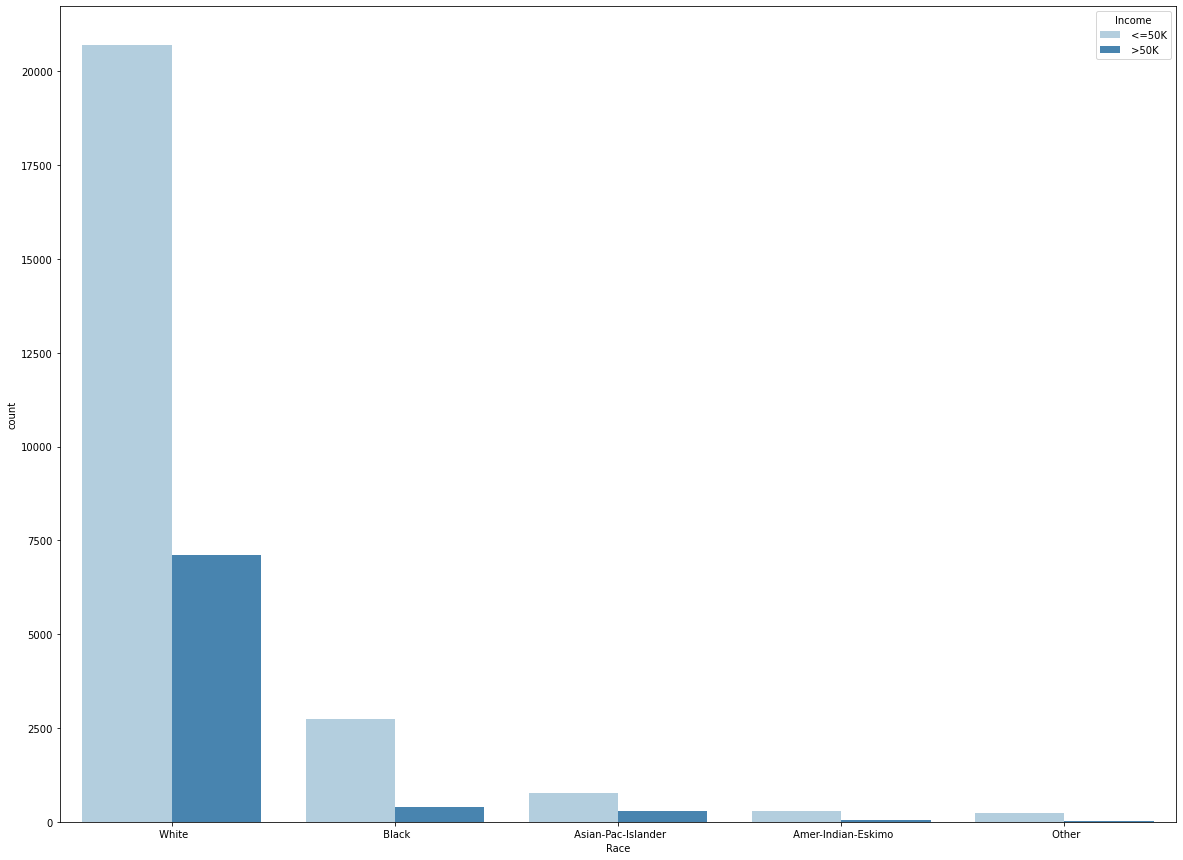

In [19]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'Race', hue = 'Income', palette = 'Blues', data = data)

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

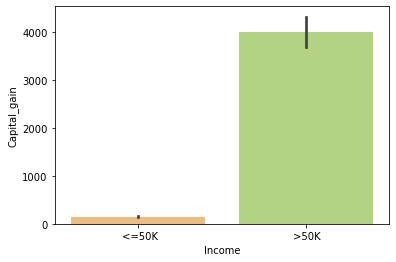

In [20]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = data, palette = 'RdYlGn')

### We can see from the above figure that people with higher capital gain are the ones who earn more than 50K

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

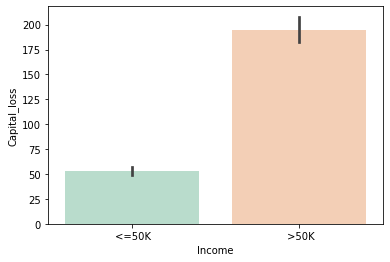

In [21]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = data, palette = 'Pastel2')

### People with income more than 50K are the ones with higher capital loss, however the capital gains are in the range of thousands when compared to losses which are in hundreds.

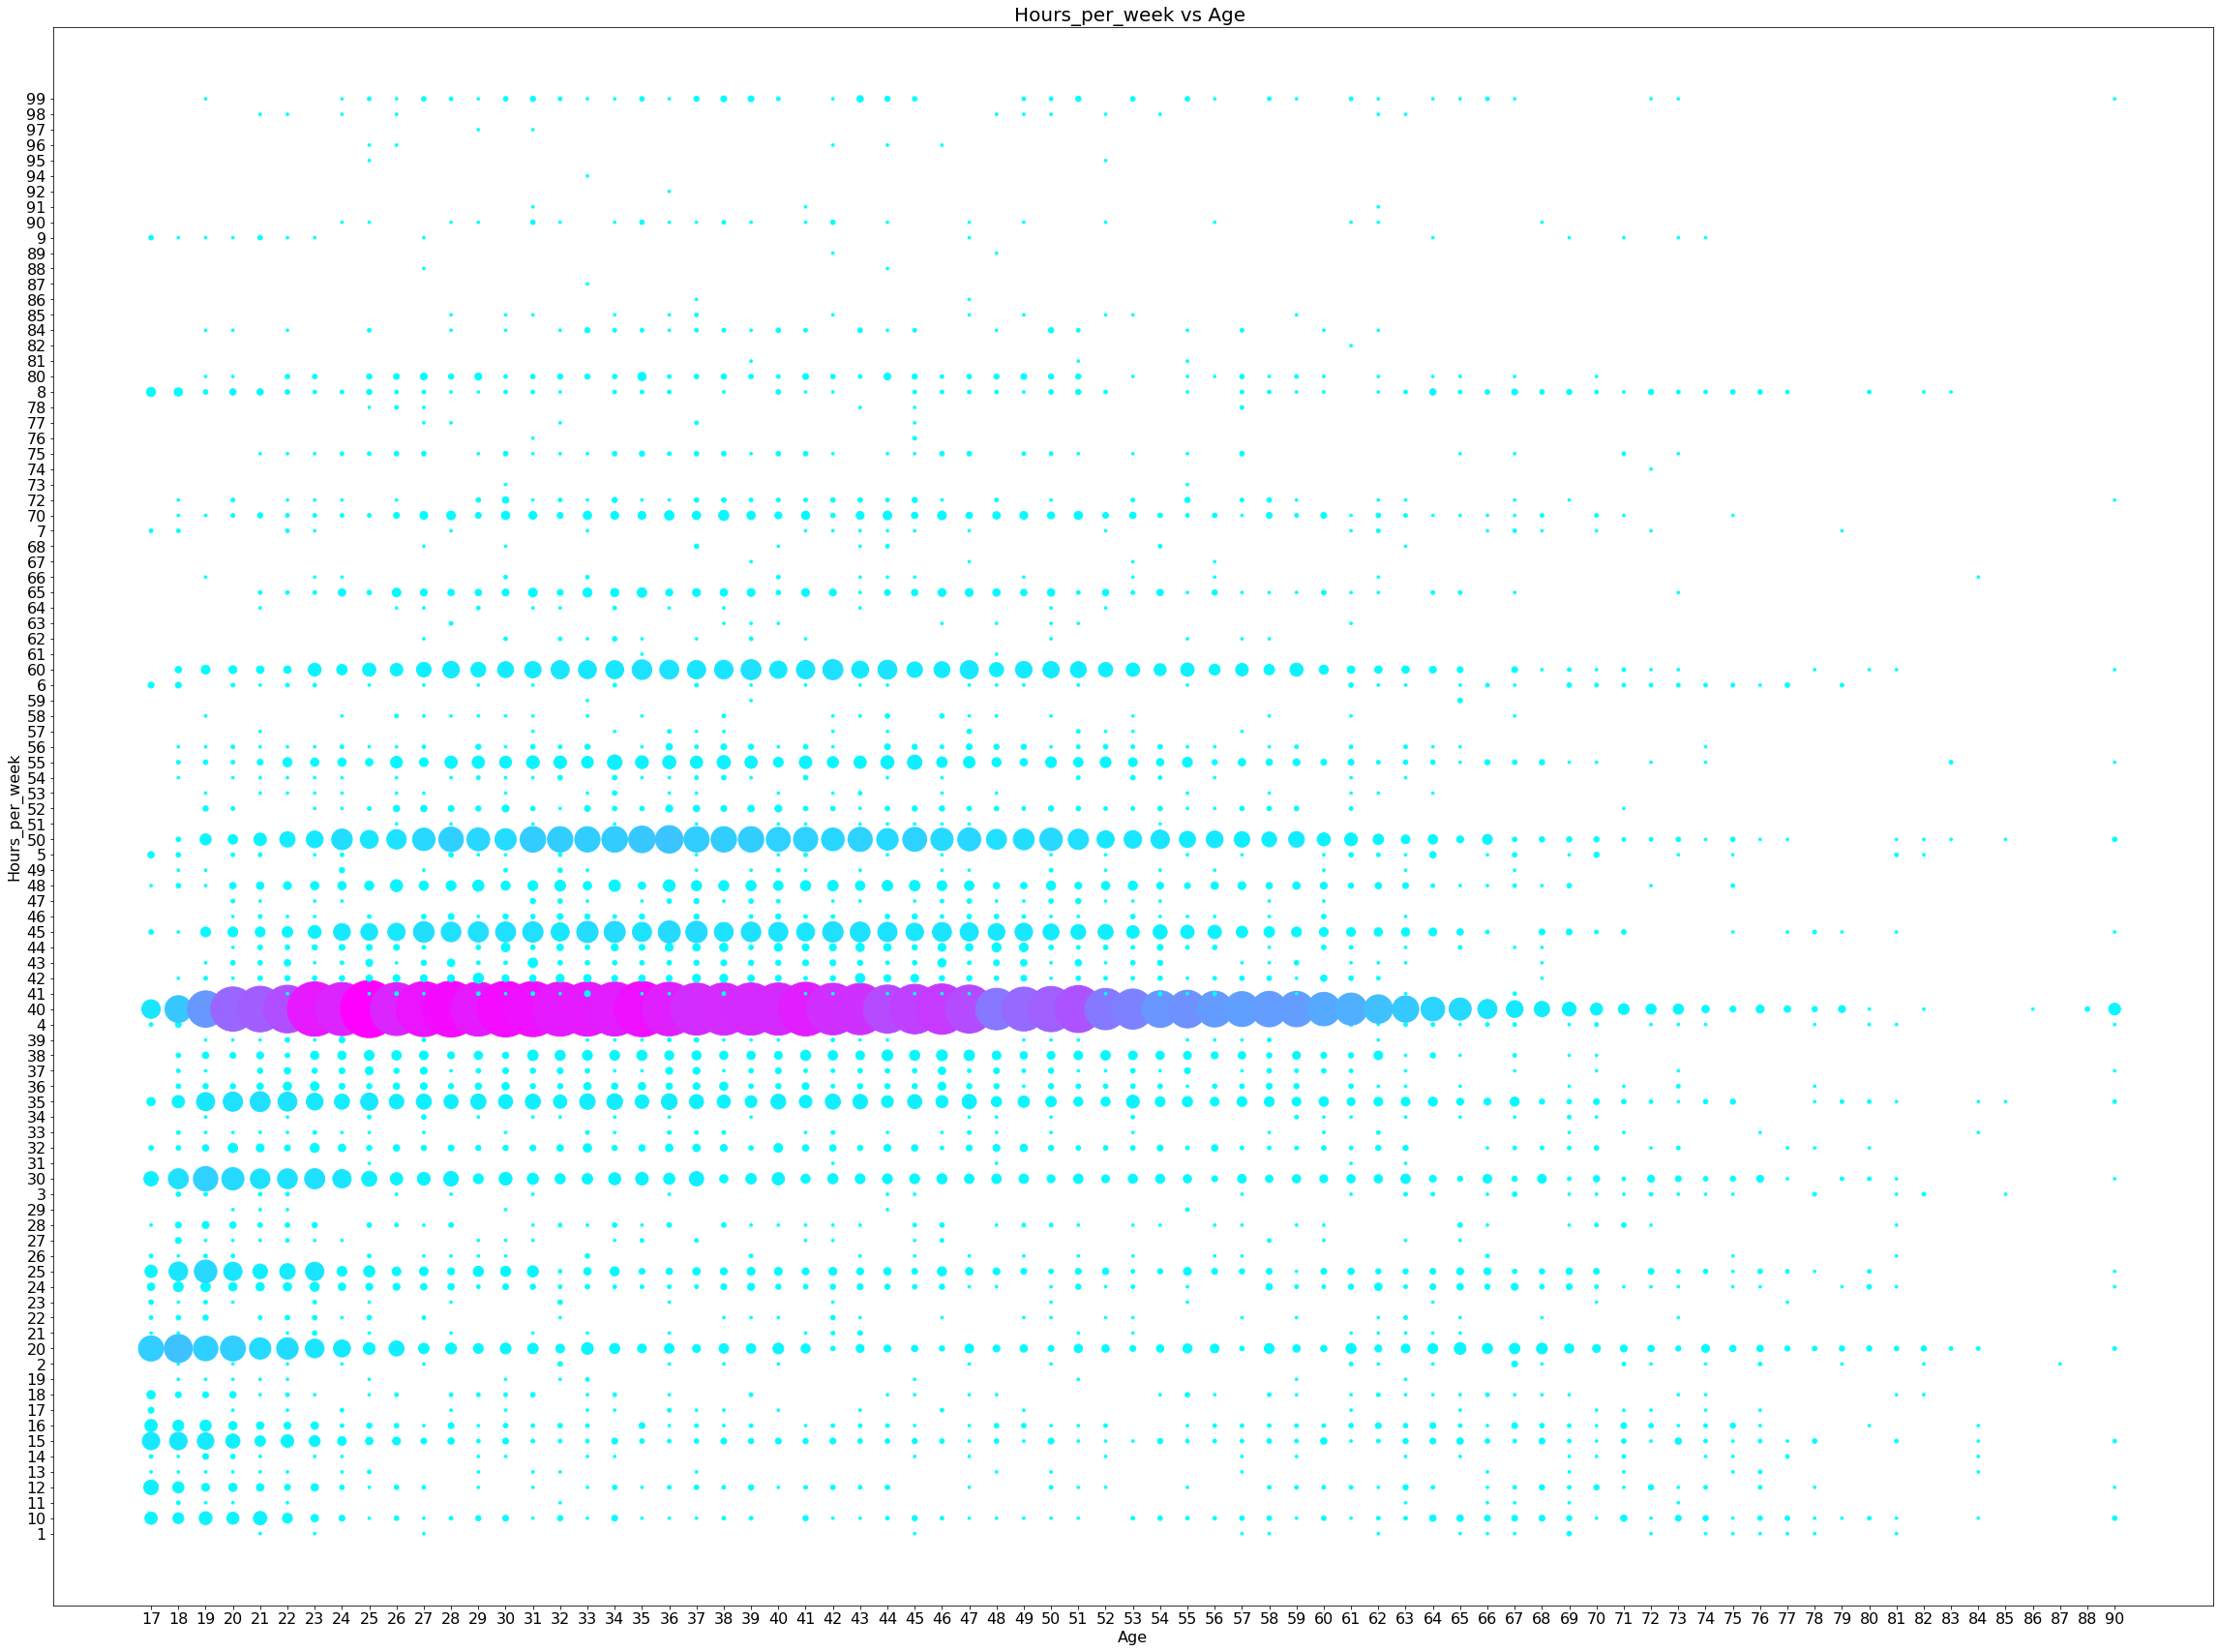

In [22]:
from bubble_plot.bubble_plot import bubble_plot
bubble_plot(data,'Age','Hours_per_week', normalization_by_all=True,figsize = (40,30))

### We can see from the above plot that the people above 23 years and below 50 years of age, who work more than 38 hours per week earn higher revenue. Most likely >50K

In [23]:
cross = pd.crosstab(index= data['Native_country'],columns = data['Income'])
round(((cross.T)/cross.sum(axis =1)).T,2)

Income,<=50K,>50K
Native_country,,
?,0.75,0.25
Cambodia,0.63,0.37
Canada,0.68,0.32
China,0.73,0.27
Columbia,0.97,0.03
Cuba,0.74,0.26
Dominican-Republic,0.97,0.03
Ecuador,0.86,0.14
El-Salvador,0.92,0.08


<AxesSubplot:xlabel='Native_country', ylabel='count'>

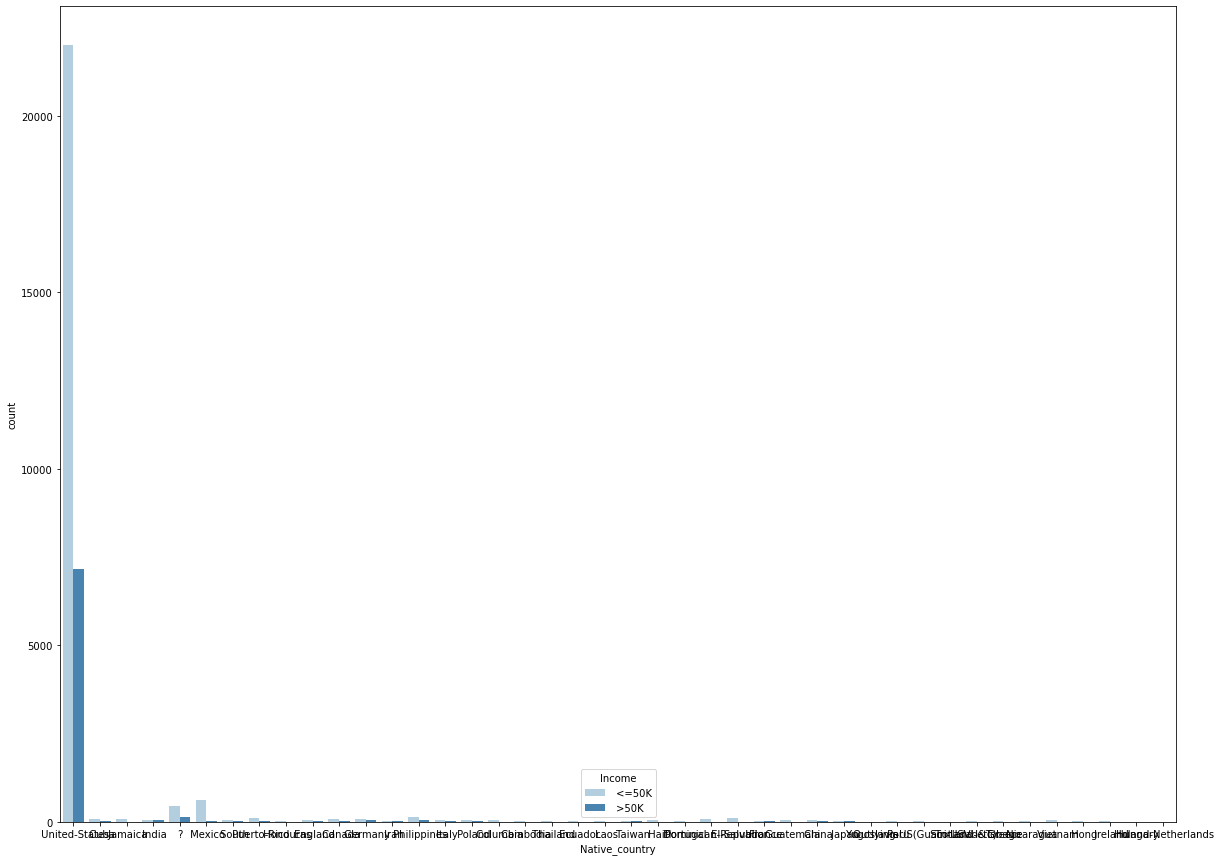

In [24]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'Native_country', hue = 'Income', palette = 'Blues', data = data)

### More than 75% people's native is United States of America.

### Lets start encoding the data. For encoding I will be using Label Encoder as well as Binary Encoder. Let's look at the data once

In [25]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Before encoding, I willbe dropping the education column because I have another feature which explains the same

In [26]:
dataset = data.drop(columns = 'Education')

In [27]:
dataset.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Since there are only 2 categories for the columns like Sex and Income, I'm using get_dummies function to encode them

In [28]:
dataset[['Sex','Income']] = pd.get_dummies(dataset[['Sex','Income']], drop_first = True)

### Importing Binary Encoder and Encoding the categorical variables

In [29]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
data = be.fit_transform(dataset[['Workclass','Marital_status','Occupation','Relationship','Race','Native_country']],
                       return_df=True)


### joining the encoded data with the original dataset

In [30]:
dataset = pd.concat([dataset,data], axis = 1)
dataset.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Race_1,Race_2,Race_3,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Native_country_6
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,...,0,0,1,0,0,0,0,0,0,1
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,...,0,0,1,0,0,0,0,0,0,1
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,...,0,1,0,0,0,0,0,0,0,1
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,...,0,1,0,0,0,0,0,0,1,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,...,0,0,1,0,0,0,0,0,0,1


### Deleting the categorical columns as the same data has been encoded and joined

In [31]:
dataset = dataset.drop(columns = ['Workclass','Marital_status','Occupation','Relationship','Race','Native_country'])

### Checking for the shape of the dataset and presence of null-value

In [32]:
dataset.shape

(32560, 37)

In [33]:
dataset.isnull().sum()

Age                 0
Fnlwgt              0
Education_num       0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Income              0
Workclass_0         0
Workclass_1         0
Workclass_2         0
Workclass_3         0
Workclass_4         0
Marital_status_0    0
Marital_status_1    0
Marital_status_2    0
Marital_status_3    0
Occupation_0        0
Occupation_1        0
Occupation_2        0
Occupation_3        0
Occupation_4        0
Relationship_0      0
Relationship_1      0
Relationship_2      0
Relationship_3      0
Race_0              0
Race_1              0
Race_2              0
Race_3              0
Native_country_0    0
Native_country_1    0
Native_country_2    0
Native_country_3    0
Native_country_4    0
Native_country_5    0
Native_country_6    0
dtype: int64

### Checking for correlation of the variables with the target column

In [34]:
corr_data = dataset.corr()
corr_data['Income'].sort_values(ascending = False)

Income              1.000000
Marital_status_3    0.386498
Relationship_3      0.361173
Education_num       0.335182
Age                 0.234039
Hours_per_week      0.229690
Capital_gain        0.223333
Sex                 0.215995
Occupation_4        0.195869
Capital_loss        0.150523
Workclass_4         0.107628
Race_3              0.094513
Workclass_2         0.065728
Occupation_3        0.065417
Native_country_6    0.037052
Native_country_3    0.003064
Fnlwgt             -0.009481
Workclass_1        -0.014308
Native_country_1   -0.022087
Native_country_4   -0.022841
Native_country_2   -0.022922
Native_country_5   -0.032406
Race_1             -0.042912
Workclass_3        -0.068414
Race_2             -0.073032
Occupation_1       -0.098693
Relationship_2     -0.148653
Marital_status_2   -0.153757
Occupation_2       -0.179384
Relationship_1     -0.310473
Marital_status_1   -0.355069
Workclass_0              NaN
Marital_status_0         NaN
Occupation_0             NaN
Relationship_0

In [35]:
print("""
After Encoding the variables the below features returned with NAN correlation because the data for those columns are 0 for all the rows
\n\n Workclass_0              \tNaN
\nMarital_status_0         \tNaN
\nOccupation_0             \tNaN
\nRelationship_0           \tNaN
\nRace_0                   \tNaN
\nNative_country_0         \tNaN
""")


After Encoding the variables the below features returned with NAN correlation because the data for those columns are 0 for all the rows


 Workclass_0              	NaN

Marital_status_0         	NaN

Occupation_0             	NaN

Relationship_0           	NaN

Race_0                   	NaN

Native_country_0         	NaN



### Removing the same from the dataset

In [36]:
dataset = dataset.drop(columns = ['Workclass_0','Marital_status_0','Occupation_0','Relationship_0','Race_0',
                                 'Native_country_0'])

### Visualizing the correalation with each variable with one another, also checking for multicollenearity

<AxesSubplot:>

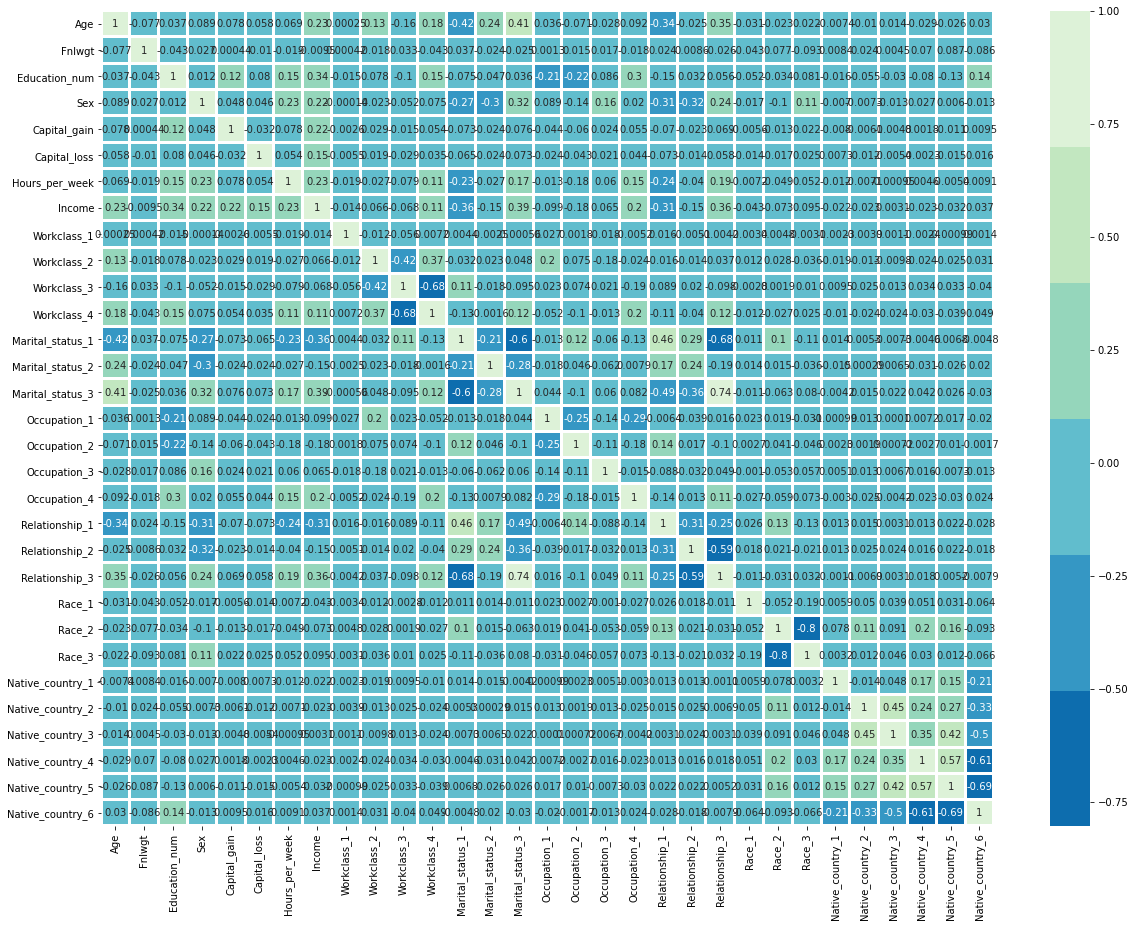

In [37]:
corr_data = dataset.corr()
plt.figure(figsize = (20,15))
color = sns.color_palette('GnBu_r')
sns.heatmap(corr_data, annot = True, linewidths=2, cmap = color)

### There is no multicollinearity issue with the data, only race 3 is correlated with race 2 with -0.8 correlation which is managable

## Checking for outliers

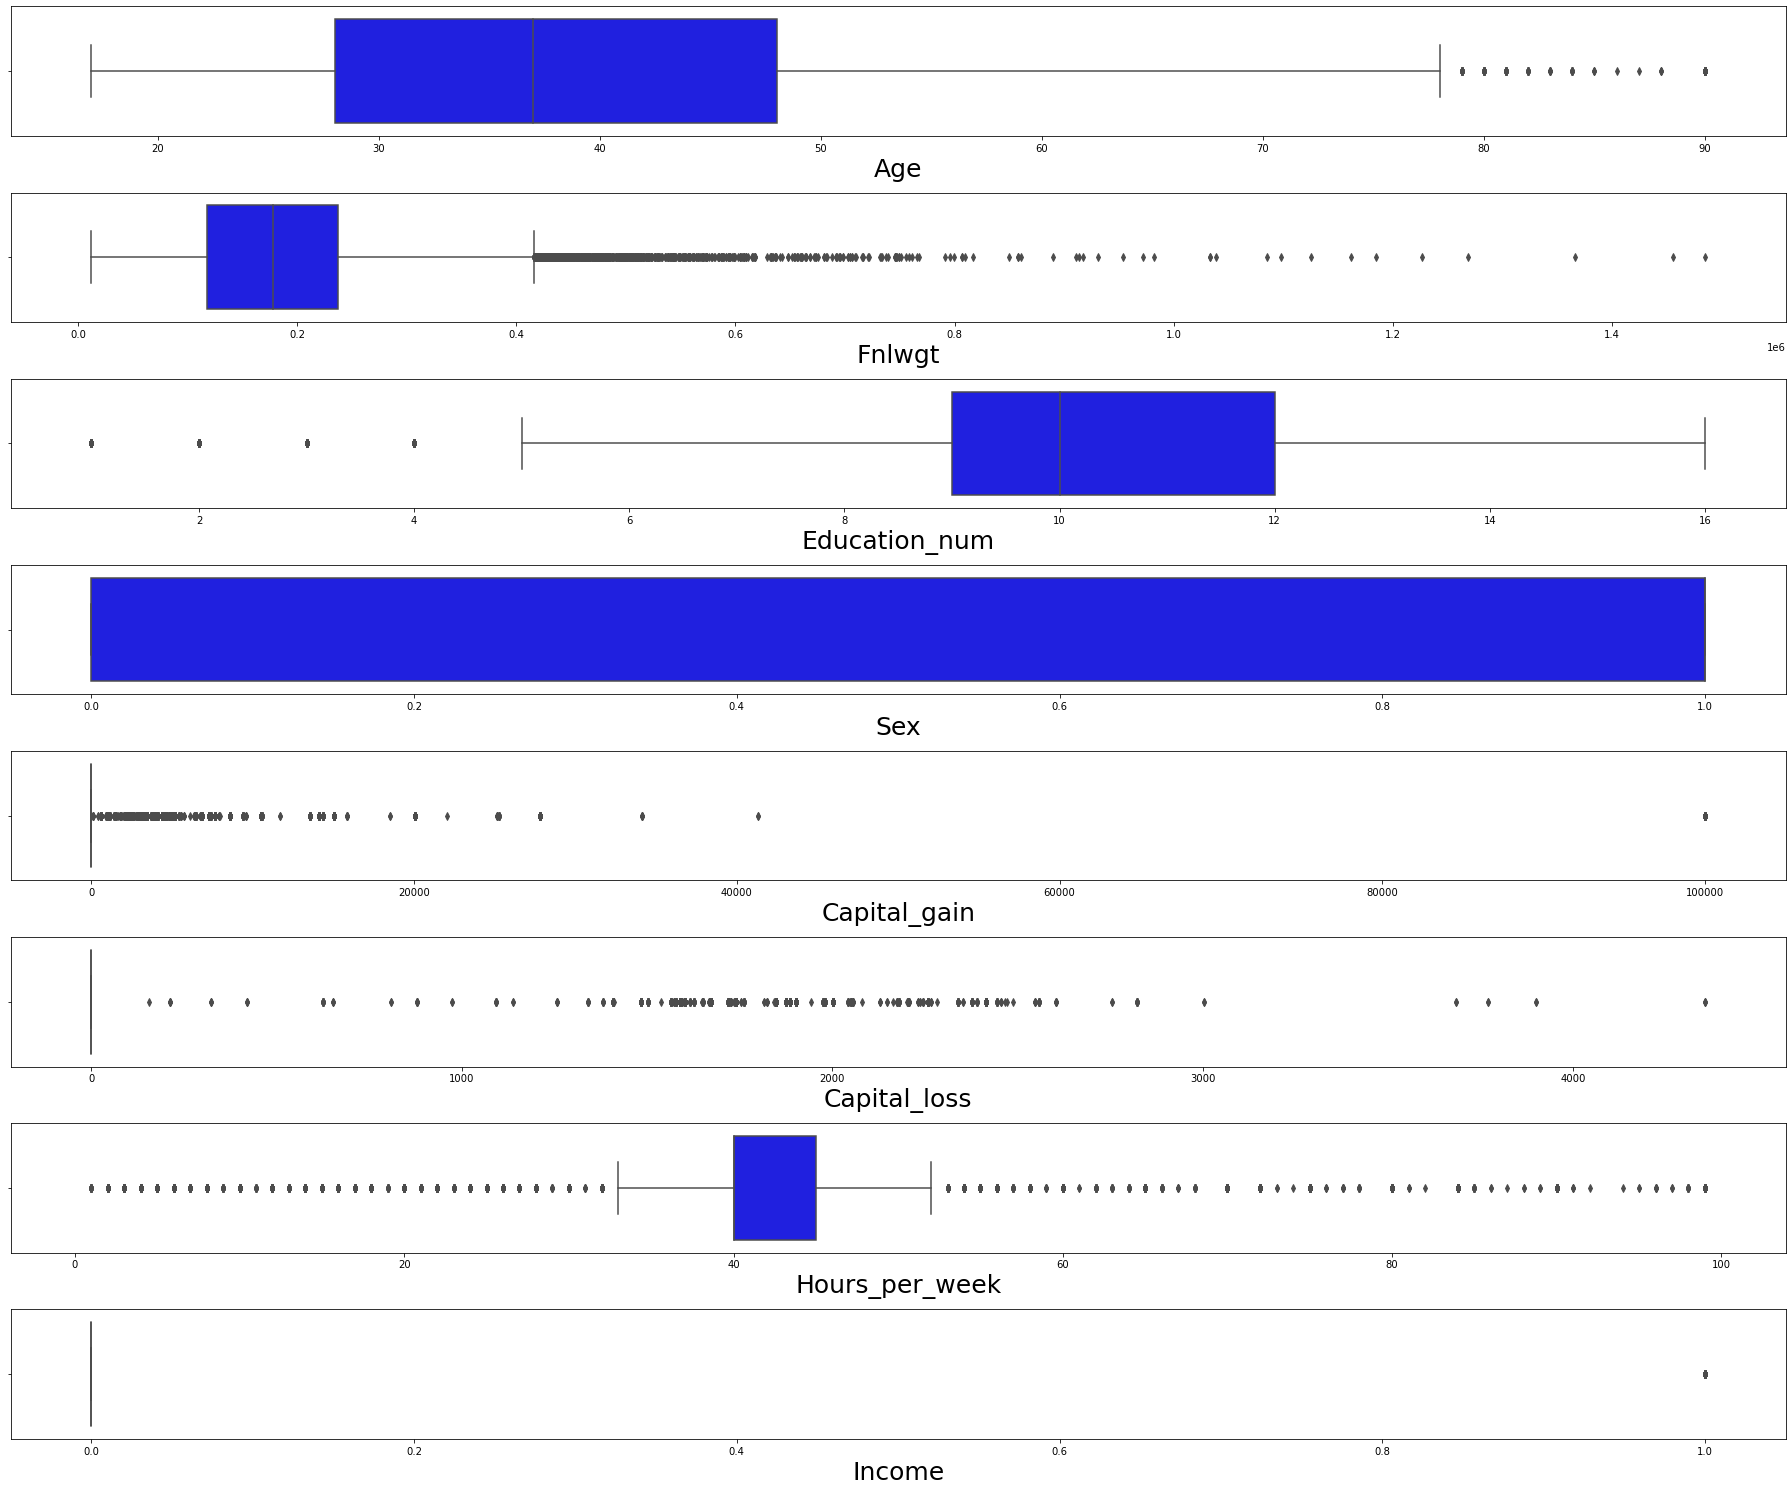

In [38]:
plt.figure(figsize= (25,90))
pltnum = 1
for i in dataset.iloc[:,:8]:
    if pltnum <=35:
        plt.subplot(35,1,pltnum)
        sns.boxplot(dataset[i],color = 'blue')
        plt.xlabel(i,fontsize=25)
    pltnum+=1
plt.tight_layout()

### I am Plotting boxplot only for continuous variables and I can see there are lot of outliers in the data. Therefore removing them using zscore method

In [39]:
z = np.abs(zscore(dataset[['Fnlwgt', 'Capital_gain','Capital_loss','Hours_per_week']]))
z

array([[1.0087417 , 0.14591373, 0.21666301, 2.22212013],
       [0.24504633, 0.14591373, 0.21666301, 0.03542999],
       [0.42576955, 0.14591373, 0.21666301, 0.03542999],
       ...,
       [0.3588108 , 0.14591373, 0.21666301, 0.03542999],
       [0.11092744, 0.14591373, 0.21666301, 1.65520046],
       [0.92986178, 1.88840054, 0.21666301, 0.03542999]])

In [40]:
new_df  = dataset[(z<2.8).all(axis = 1)]
print(dataset.shape)
print(new_df.shape)

(32560, 31)
(29932, 31)


### There is a 8% removal of data. Therefore proceeding with the removal of outlier

## Checking for data distribution

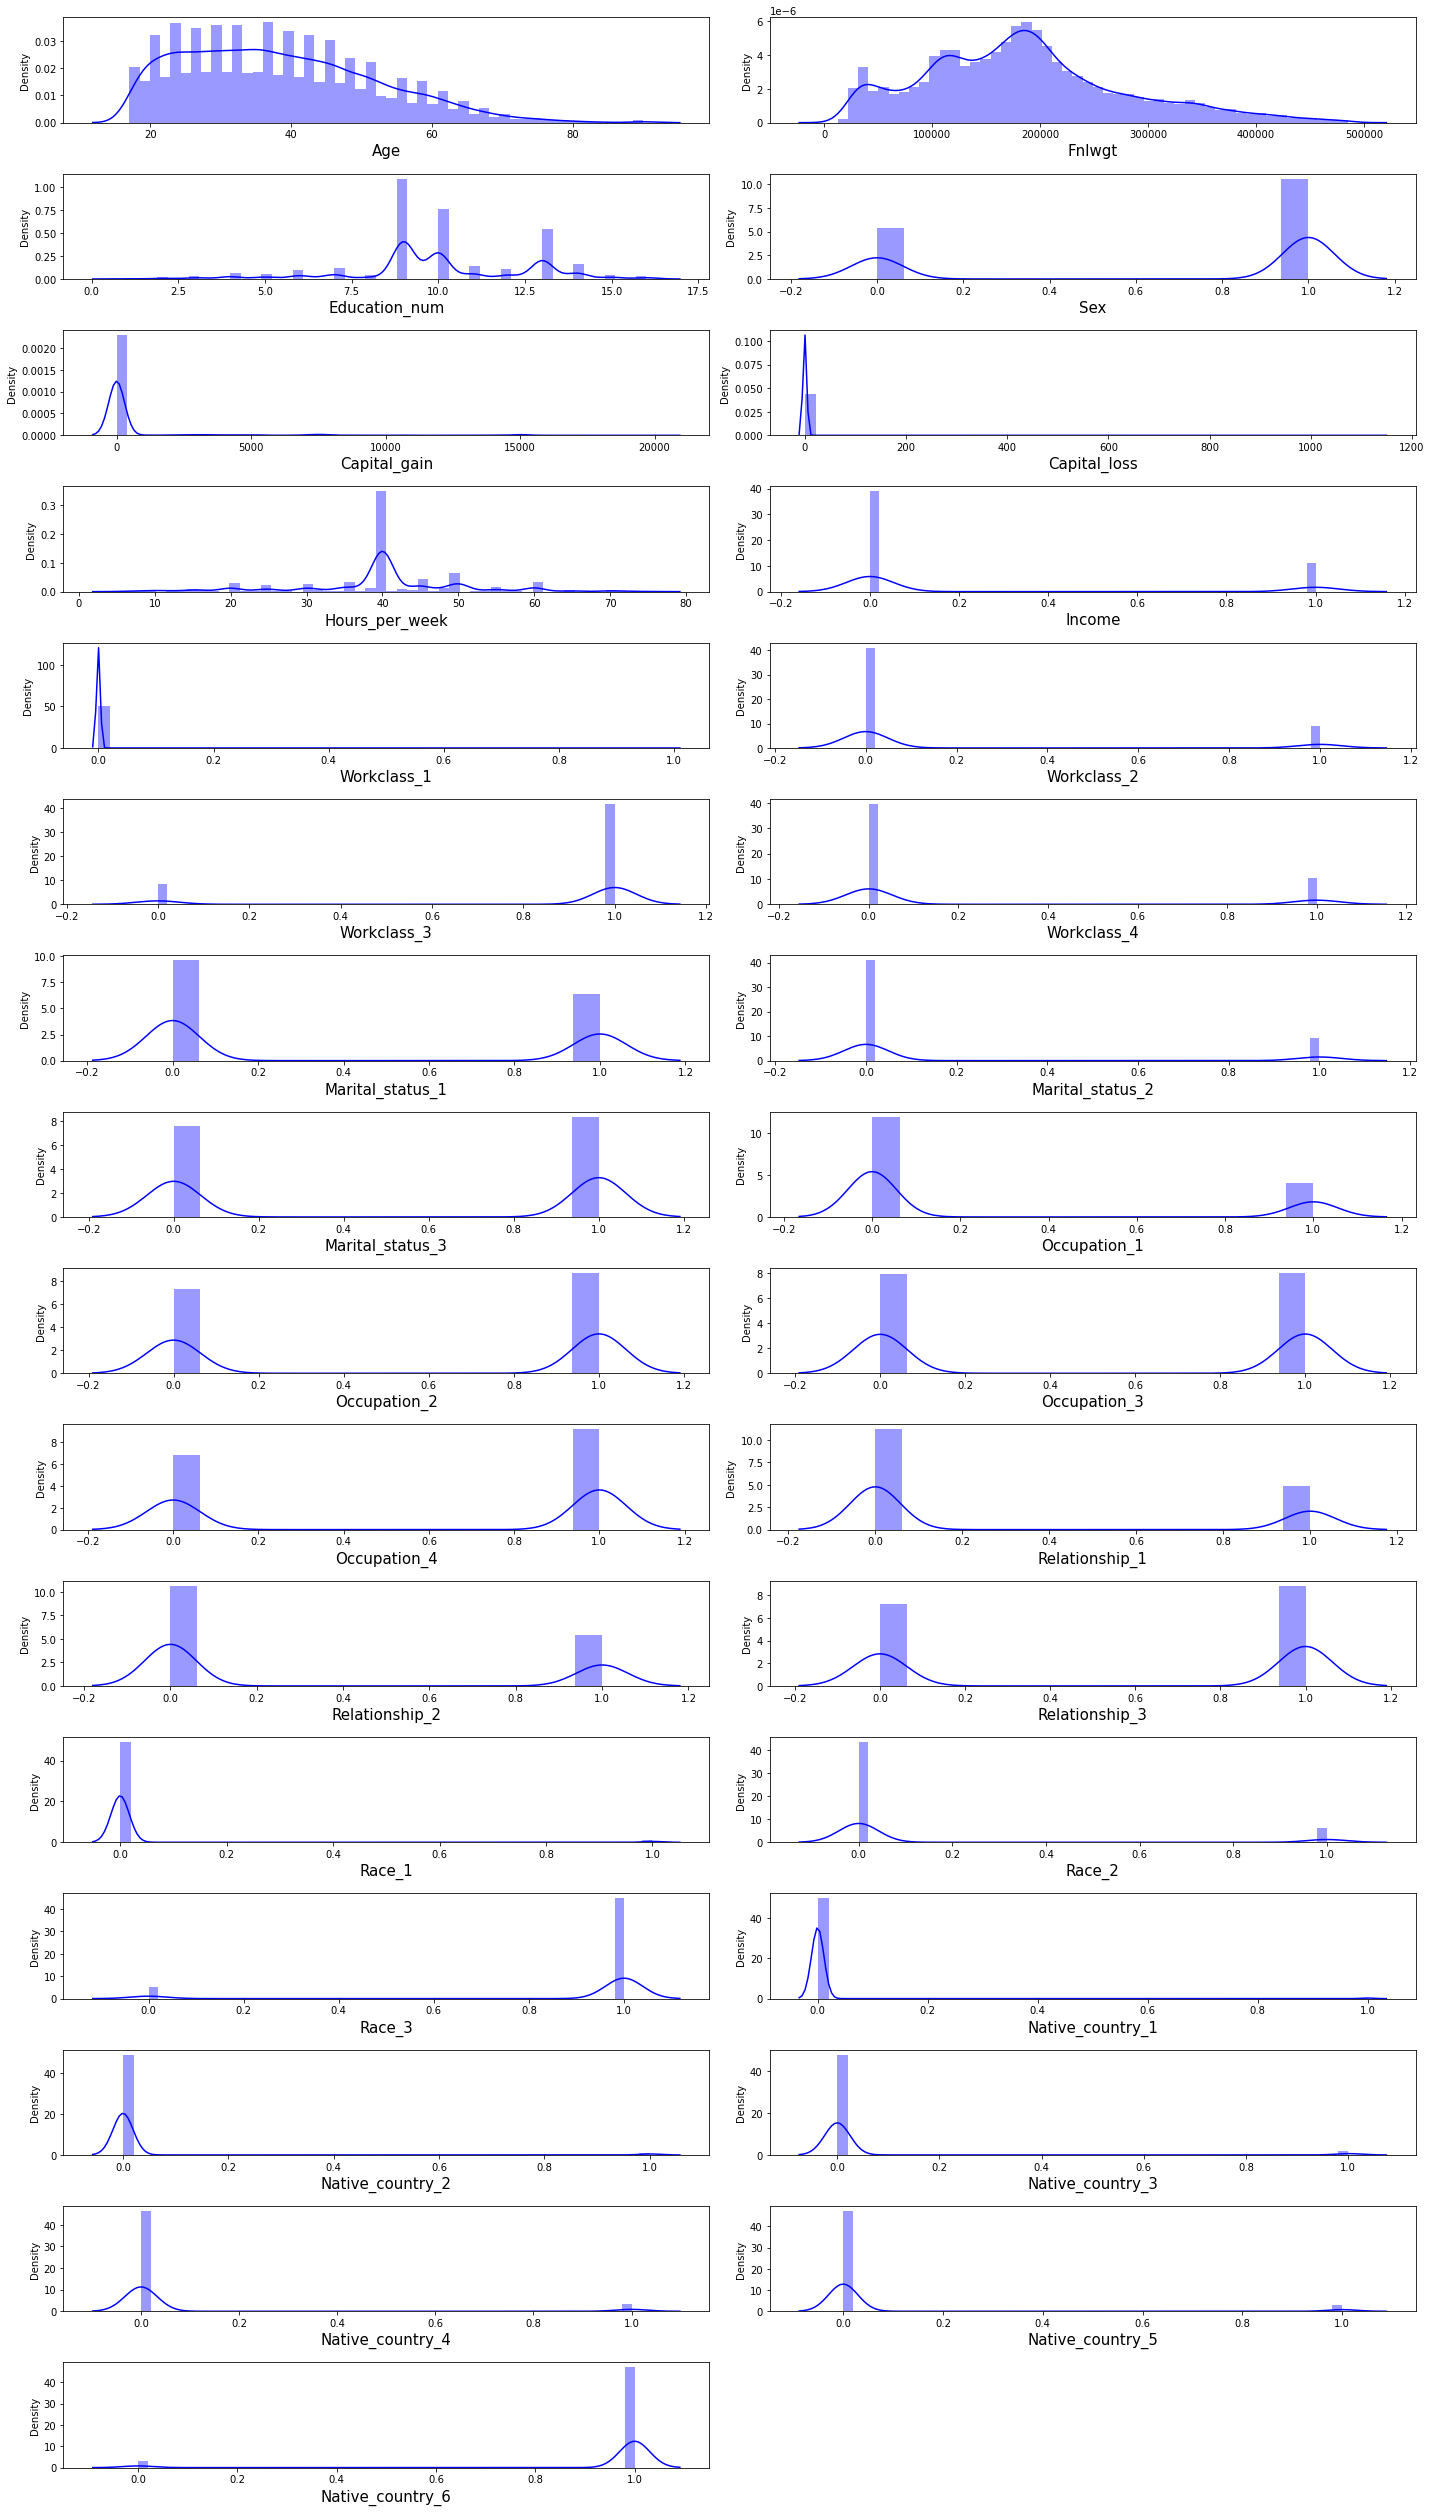

In [41]:
plt.figure(figsize= (20,35))
pltnum = 1
for i in new_df:
    if pltnum <=32:
        plt.subplot(16,2,pltnum)
        sns.distplot(new_df[i],color = 'blue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### Upon reviewing I can see that there is skewness present for continuous columns. Let's check for skewness coefficient

In [42]:
new_df.skew()

Age                  0.564486
Fnlwgt               0.588854
Education_num       -0.325945
Sex                 -0.684827
Capital_gain         4.944037
Capital_loss        30.999167
Hours_per_week      -0.297146
Income               1.336735
Workclass_1         38.649067
Workclass_2          1.666456
Workclass_3         -1.771203
Workclass_4          1.421022
Marital_status_1     0.411225
Marital_status_2     1.642792
Marital_status_3    -0.097676
Occupation_1         1.153113
Occupation_2        -0.172638
Occupation_3        -0.007751
Occupation_4        -0.293792
Relationship_1       0.868165
Relationship_2       0.699396
Relationship_3      -0.207316
Race_1               7.131519
Race_2               2.233928
Race_3              -2.563240
Native_country_1    11.153053
Native_country_2     6.322333
Native_country_3     4.706850
Native_country_4     3.321538
Native_country_5     3.835378
Native_country_6    -3.686956
dtype: float64

### I can see some skewness for the continuous data columns, therefore first splitting the data and using power transformation to remove the skewness, since there is a presence of negative data I'm using 'yeo-johnson' method

In [43]:
x =new_df.drop(columns = 'Income')
y = new_df['Income']

In [44]:
trans = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(trans, columns = x.columns)

### Lets check for the outliers and skewness again

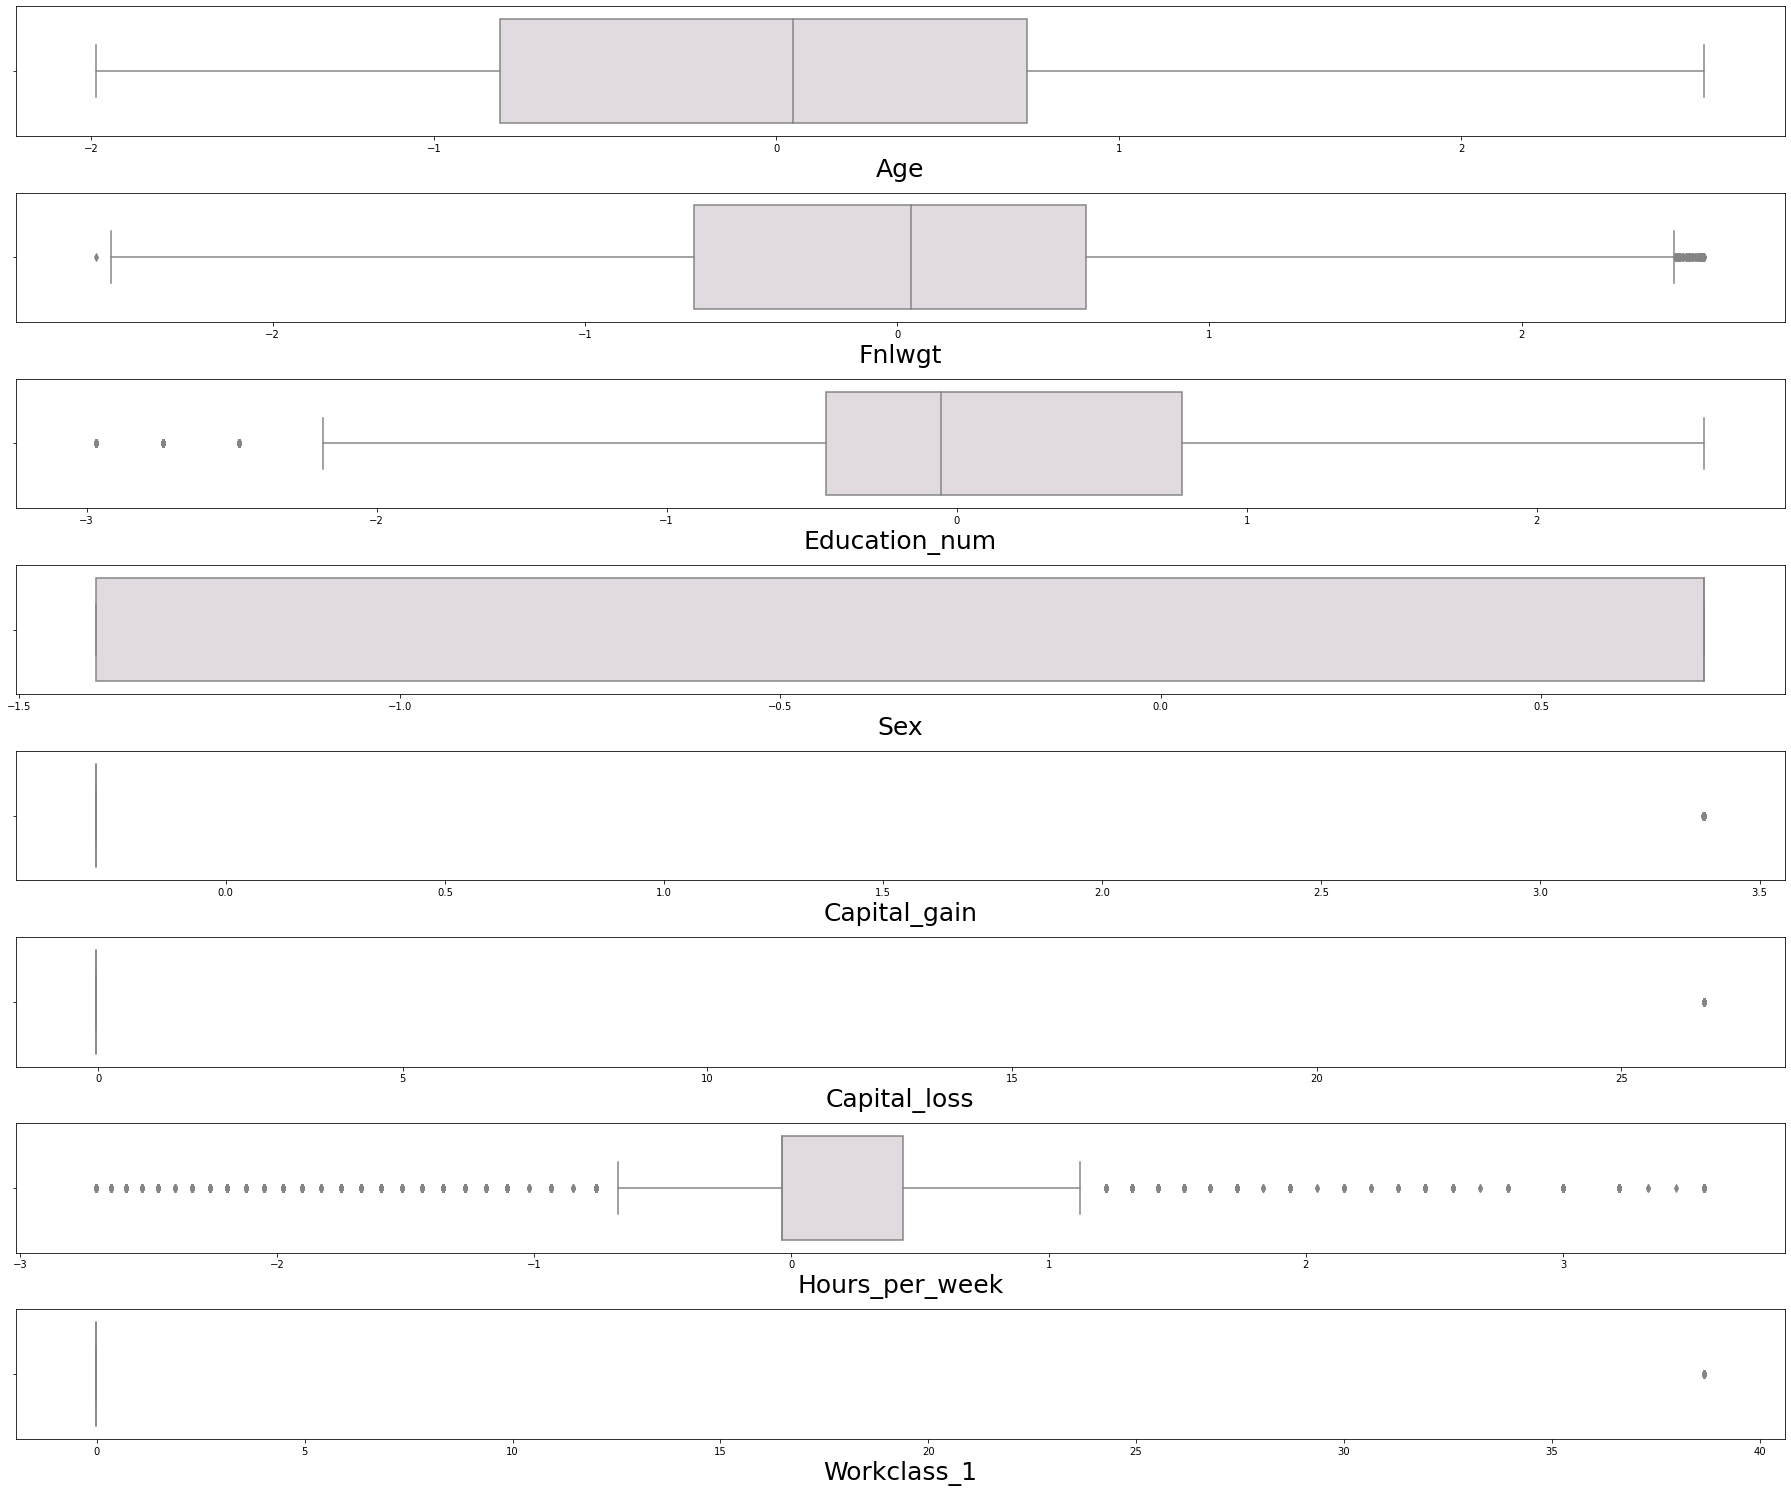

In [45]:
plt.figure(figsize= (25,90))
pltnum = 1
for i in x.iloc[:,:8]:
    if pltnum <=35:
        plt.subplot(35,1,pltnum)
        sns.boxplot(x[i],palette = 'twilight_shifted')
        plt.xlabel(i,fontsize=25)
    pltnum+=1
plt.tight_layout()

### Looks like the outliers are under control. let's check for the data distribution

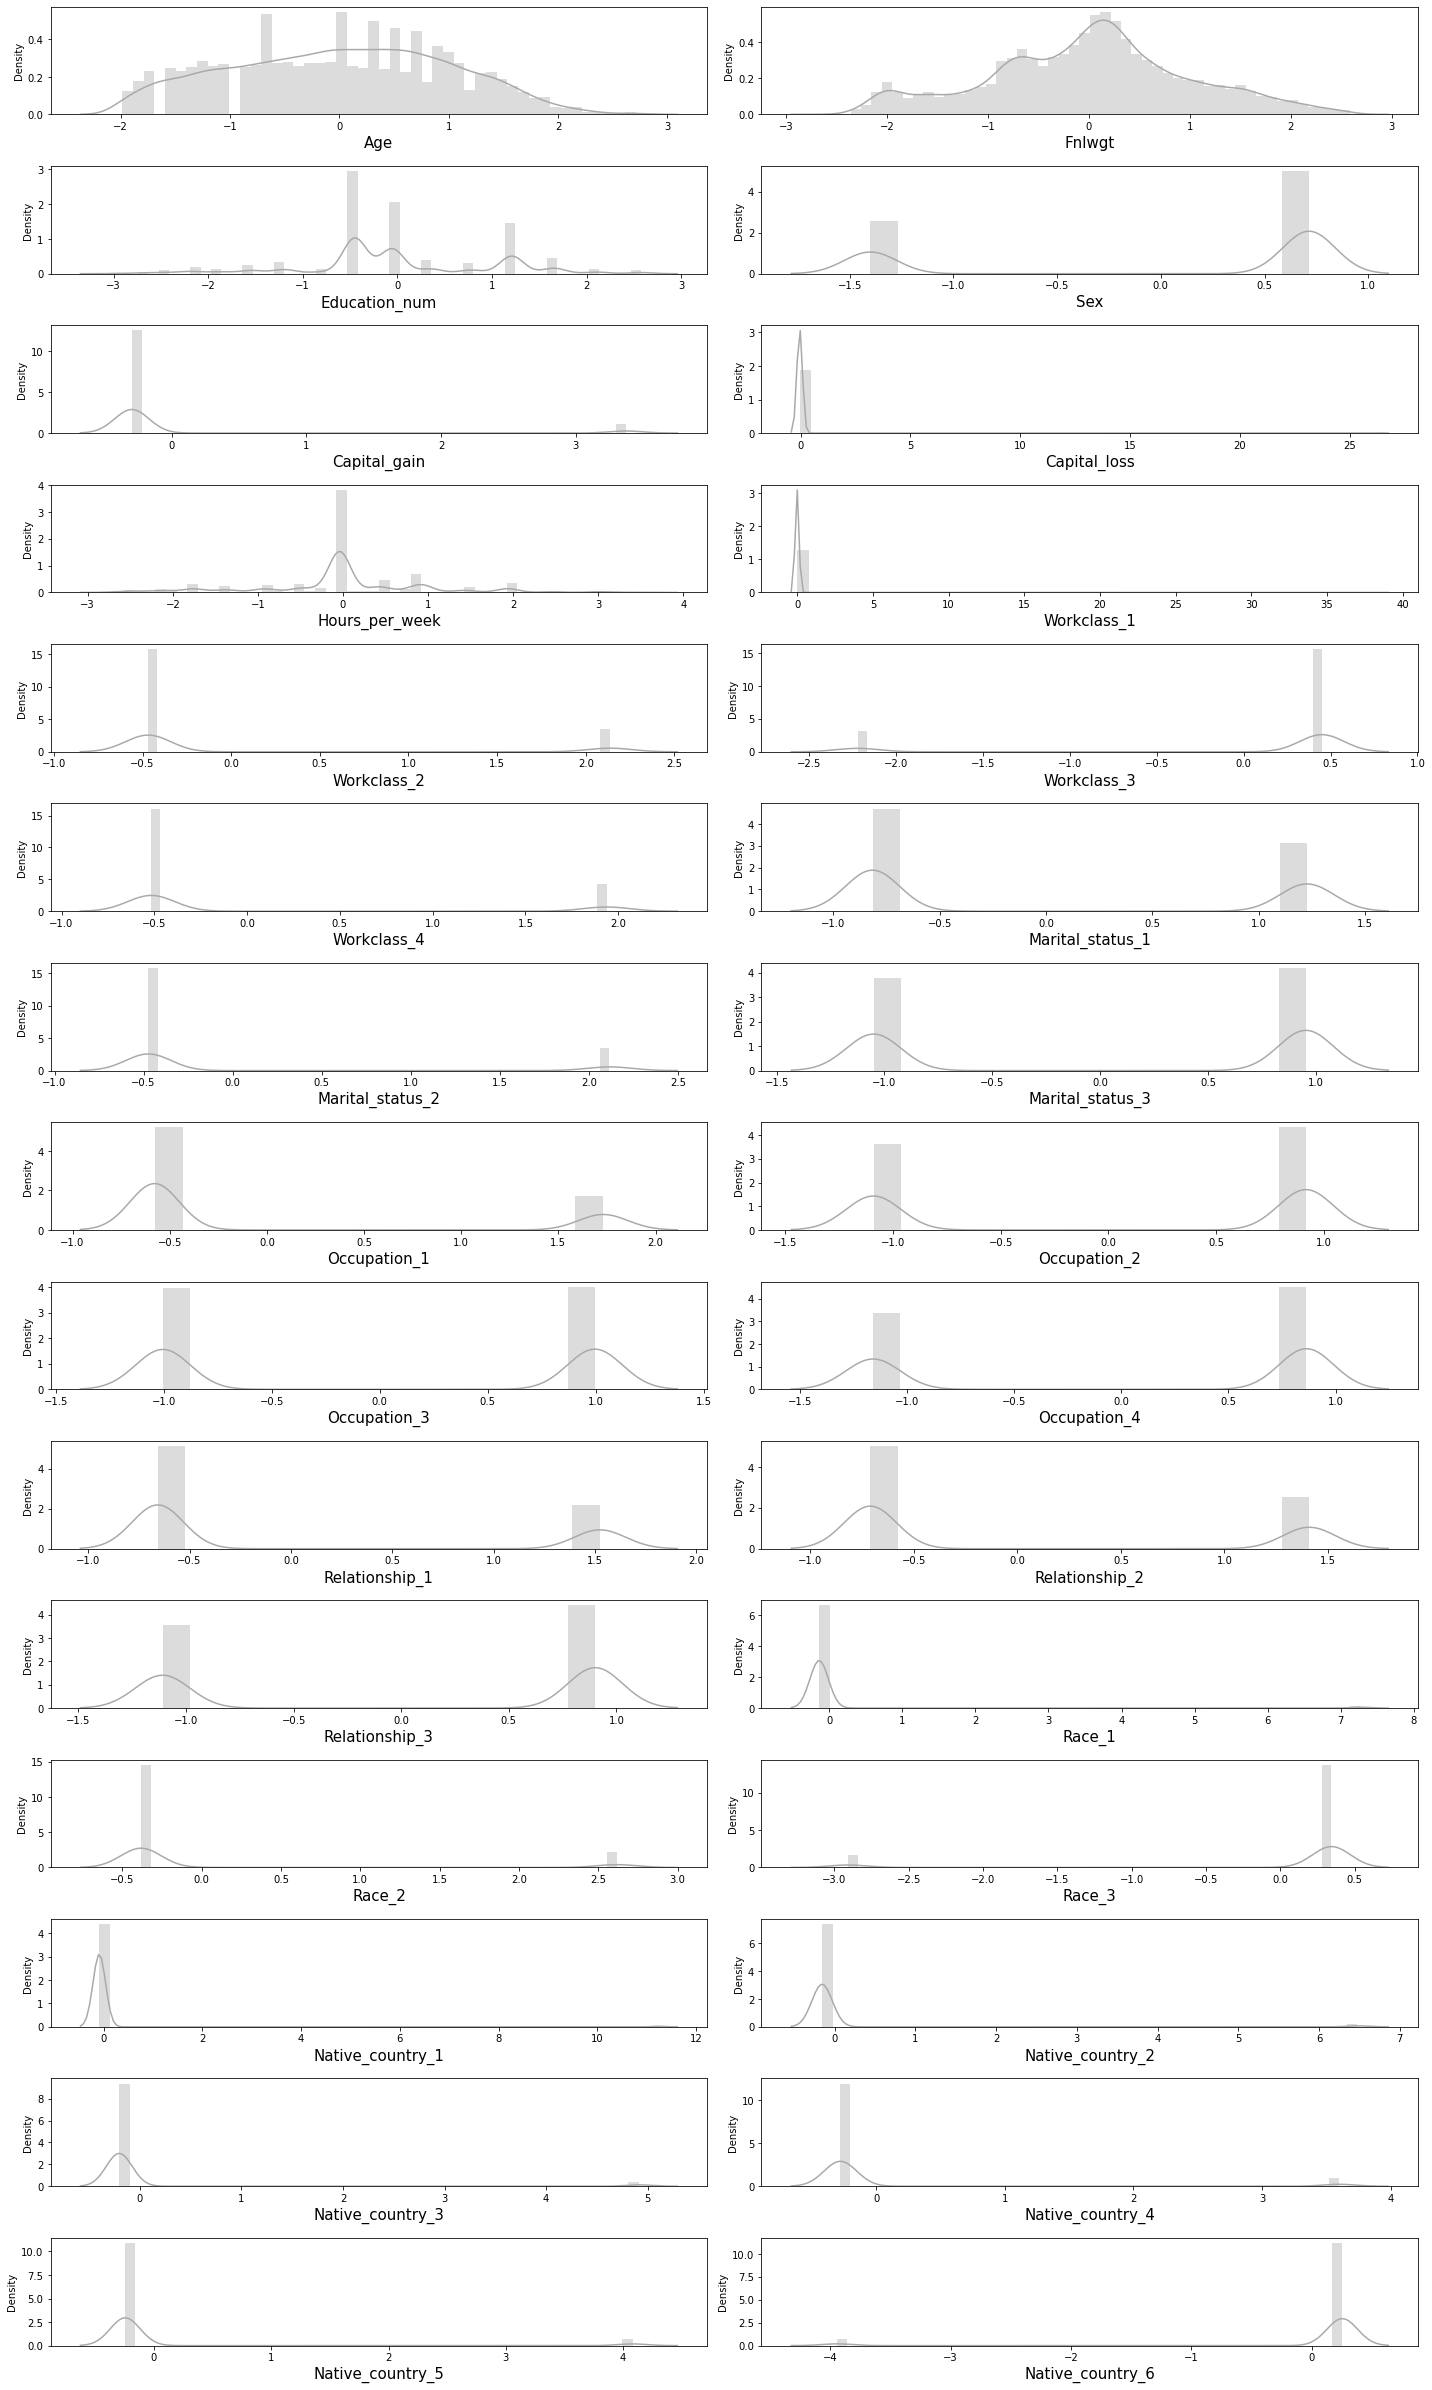

In [46]:
plt.figure(figsize= (20,35))
pltnum = 1
for i in x:
    if pltnum <=32:
        plt.subplot(16,2,pltnum)
        sns.distplot(x[i],color = 'darkgray')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### The skewness on the continuous data columns are under control. Let's proceed with model building. Before that I want to check for class imabalance in the data

In [47]:
y.value_counts()

0    23282
1     6650
Name: Income, dtype: int64

### Using SMOTE to fix the class imbalance issue.

In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

## Determining the best random statefor train test split

In [49]:
from sklearn.linear_model import LogisticRegression
brs = 0
for i in range(0,3000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        if i>brs:
            brs = i
print('the best random state for the data set is', brs)

the best random state for the data set is 2991


### Splitting the dataset using the best random state

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = brs)

## Model 1: Logistic Regression

In [51]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)
print('The Accuracy score for the Logistic Regression is' , lg_score)

The Accuracy score for the Logistic Regression is 0.818767488774647


## Model 2: KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,knn_pred)
print('The Accuracy score for the KNeigbhors Classifier is' , knn_score)

The Accuracy score for the KNeigbhors Classifier is 0.8464241556582287


## Model 3: Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
rf_score = accuracy_score(y_test,rf_pred)
print('The Accuracy score for the Random Forest Classifier is' , rf_score)

The Accuracy score for the Random Forest Classifier is 0.8950348148630182


## Model 4: Extra Trees Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test,et_pred)
print('The Accuracy score for the Extra Trees Classifier is' , et_score)

The Accuracy score for the Extra Trees Classifier is 0.8972473482137047


## Model 5: Support Vector Classifier

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
sv_pred =svc.predict(x_test)
sv_score = accuracy_score(y_test,sv_pred)
print('The Accuracy score for the Support Vector Classifier is' , sv_score)

The Accuracy score for the Support Vector Classifier is 0.8403722261989979


## Model 6: XGBoost Classifier

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_pred)
print('The Accuracy score for the XG Boost Classifier is' , xgb_score)

The Accuracy score for the XG Boost Classifier is 0.9040801717967072


### Lets proceed with cross validation to determine the best model

In [57]:
cv = cross_val_score(lg,x_over,y_over, cv =7)
cv_mean = cv.mean()
cv_mean

0.8189588523322738

In [58]:
cv1 = cross_val_score(knn,x_over,y_over, cv =7)
cv1_mean = cv1.mean()
cv1_mean

0.8601494716948715

In [59]:
cv2 = cross_val_score(rf,x_over,y_over, cv =7)
cv2_mean = cv2.mean()
cv2_mean

0.9032514388798213

In [60]:
cv3 = cross_val_score(et,x_over,y_over, cv =7)
cv3_mean = cv3.mean()
cv3_mean

0.9093076196203075

In [ ]:
cv4 = cross_val_score(svc,x_over,y_over, cv =7)
cv4_mean = cv4.mean()
cv4_mean

In [ ]:
cv5 = cross_val_score(xgb,x_over,y_over, cv =7)
cv5_mean = cv5.mean()
cv5_mean

### Deciding  the best model based on the below dataframe

In [ ]:
mod1 = [lg_score,knn_score,rf_score,et_score,sv_score,xgb_score]

In [ ]:
val = [0.8190447556051886,0.8596984795120693,0.9048406494287431,0.9105532170775705,0.847263980757667,0.8909028433983334]

In [ ]:
select = pd.DataFrame({})
select['mod1'] = mod1
select['cross'] = val
select['diff'] = select['mod1'] - select['cross']

In [ ]:
select

### Although score difference are less for other model, I'm choosing Extra Trees because it reached upto 0.91 and the difference between model and cross validation is 1%

## Hyper Parameter Tuning

In [ ]:
params = {'n_estimators':[100,150,200,250,300],
         'criterion':['gini','entropy'],
         'max_depth':[24,26,28,30],
         'min_samples_split':[3,5,7,9],
         'bootstrap':[True,False]}

In [ ]:
gcv = GridSearchCV(ExtraTreesClassifier(),params, cv =5, n_jobs =-1)
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

### Fitting and predicting using the best model

In [ ]:
fnl_mod = ExtraTreesClassifier(bootstrap = False,criterion = 'entropy',max_depth = 30,
                              min_samples_split = 3, n_estimators = 250, n_jobs = -1)
fnl_mod.fit(x_train,y_train)
fnl_pred = fnl_mod.predict(x_test)
fnl_score = accuracy_score(y_test,fnl_pred)
print('The Accuracy score for the Tuned Extra Trees Classifier is' , fnl_score)

## Classification report

In [ ]:
print(classification_report(y_test,fnl_pred))

### We have a balanced f1-score, let's proceed with find auc score

In [ ]:
print(roc_auc_score(y_test, fnl_pred))

### Plotting the ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds  = roc_curve(fnl_pred, y_test)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (20,15))
plt.plot(fpr, tpr, lw=10, color = 'blue',label = 'ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],lw =5, color ='black', linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False positive rate', fontsize = 20)
plt.ylabel('True positive rate', fontsize  =20)
plt.title('ROC AUC Curve', fontsize = 30)
plt.legend(loc ='lower right', fontsize = 20)
plt.show()

## Saving the model

In [ ]:
import joblib
joblib.dump(fnl_mod,'Census.pkl')